In [1]:
!pip install transformers
!pip install deep_translator
!pip install rouge_score
!pip install pycountry
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=95964b44f933f5420234a8629f8b532c730b9ef65f4fc621b5afcbadd6ea8666
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.4 MB/s eta 0:00:00


In [2]:
#Importing Required Libraries
import os
from transformers import pipeline
from deep_translator import GoogleTranslator
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from rouge_score import rouge_scorer
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pycountry

In [3]:
#Uploading .story file
print("Please upload your .story file.")
uploaded = files.upload()

file_path = next(iter(uploaded))
if not os.path.isfile(file_path):
    print("File not found.")


Please upload your .story file.


Saving 611b6133500989fb51cd81f280468f8d14f072e1.story to 611b6133500989fb51cd81f280468f8d14f072e1.story


In [4]:
#Preprocessing the text
def preprocess_text(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Separate main text and highlights
    main_text = []
    highlights = []
    collecting_highlights = False
    for line in lines:
        line = line.strip()
        if line.startswith("@highlight"):
            collecting_highlights = True
        elif collecting_highlights and line:
            highlights.append(line)  # Add highlights text to highlights
        elif not collecting_highlights:
            main_text.append(line)

    # Preprocess the maintext and highlights with . at the end of each sentence
    processed_text = " ".join(main_text)
    reference_summary = ". ".join(highlights) + "." if highlights else ""

    return processed_text, reference_summary

text, reference_highlights = preprocess_text(file_path)
print("Preprocessed text after removing highlights: \n", text)
print("\n")
print("Reference hightlights at the end for calculating Rouge Score: \n", reference_highlights)


Preprocessed text after removing highlights: 
 (CNN)A door bearing a graffiti drawing by British artist Banksy was seized by police in Gaza on Thursday after a dispute over its sale, a Gaza police official told CNN on Thursday.  The owner of the door, Rabea Darduna, filed a complaint with a Gaza court stating that, without realizing its value, he sold the door for just $175 U.S.  The iron door will remain in the possession of the Khan Younis police in southern Gaza until a court hearing at a date yet to be determined.  When Darduna's Gaza home was destroyed in last summer's war, he says he felt he was left with nothing. Only a doorway and a door. He sold the door to bring in some money to care for his six children, not realizing the prize he had.  "We sold it as we would sell an iron door," Darduna said Monday, "for $175. And the man took it."  Darduna says he was duped into believing the door was a normal door when it was really a canvas for Banksy, one of the world's most famous graf

In [5]:
# Section 5: Construct TF-IDF Matrix of Important Words and Generate Word Cloud
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def display_top_tfidf_words(text, top_n=10):
    # Compute TF-IDF across the entire text
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text])

    # Get the feature names and the corresponding scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().flatten()

    # Create a DataFrame for terms and their scores, sorted by highest scores
    tfidf_df = pd.DataFrame({'Term': feature_names, 'TF-IDF Score': tfidf_scores})
    top_tfidf_words = tfidf_df.nlargest(top_n, 'TF-IDF Score')

    print(f"Top {top_n} TF-IDF Words:")
    display(top_tfidf_words)



# Display the top TF-IDF words
display_top_tfidf_words(text)



Top 10 TF-IDF Words:


,Term,TF-IDF Score
46,door,0.428174
62,gaza,0.311400
17,banksy,0.272475
36,darduna,0.233550
32,cnn,0.194625
64,graffiti,0.194625
130,says,0.194625
9,artist,0.155700
138,sold,0.155700
55,famous,0.116775


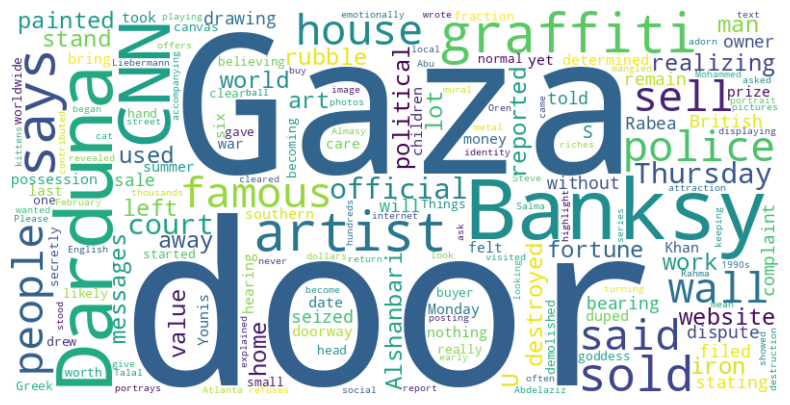

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(text)

In [7]:
# Load BART and T5 models
summarizer_bart = pipeline("summarization", model="facebook/bart-large-cnn")
summarizer_t5 = pipeline("summarization", model="t5-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [8]:
# Section 6: BART and T5 Summarization, and Important Points Extraction

def generate_summary_bart(text, max_chunk_length=512):
    # Split and summarize long texts with BART
    sentences = text.split('. ')
    current_chunk = []
    current_length = 0
    chunks = []

    for sentence in sentences:
        current_length += len(sentence.split())
        if current_length <= max_chunk_length:
            current_chunk.append(sentence)
        else:
            chunks.append(". ".join(current_chunk))
            current_chunk = [sentence]
            current_length = len(sentence.split())

    if current_chunk:
        chunks.append(". ".join(current_chunk))

    summaries = [summarizer_bart(chunk, max_length=100, min_length=50, do_sample=False)[0]['summary_text'] for chunk in chunks]
    return " ".join(summaries)

def generate_summary_t5(text, max_chunk_length=512):
    # Split and summarize long texts with T5
    sentences = text.split('. ')
    current_chunk = []
    current_length = 0
    chunks = []

    for sentence in sentences:
        current_length += len(sentence.split())
        if current_length <= max_chunk_length:
            current_chunk.append(sentence)
        else:
            chunks.append(". ".join(current_chunk))
            current_chunk = [sentence]
            current_length = len(sentence.split())

    if current_chunk:
        chunks.append(". ".join(current_chunk))

    summaries = [summarizer_t5(chunk, max_length=100, min_length=50, do_sample=False)[0]['summary_text'] for chunk in chunks]
    return " ".join(summaries)

def extract_important_points(text, num_points=5):
    # Extract important points with TF-IDF ranking
    sentences = [sentence.strip() for sentence in text.split('.') if sentence.strip()]
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sentences)
    scores = np.array(X.sum(axis=1)).flatten()

    ranked_indices = scores.argsort()[-num_points:][::-1]
    important_points = [sentences[i].strip() for i in ranked_indices]
    return important_points

# Ask user if they want a summary or important points
choice = input("Do you want a summary or important points from the given text? (Enter 'summary' or 'points'): ").strip().lower()

if choice == 'summary':
    # Generate summaries using BART and T5
    summary_bart = generate_summary_bart(text)
    summary_t5 = generate_summary_t5(text)

    # Display summaries in a formatted paragraph
    print("\n")
    print("\nSummary of the story using BART Model:\n" + "-"*40)
    print(f"{summary_bart}\n")

    print("\n")
    print("Summary of the story using T5 Model:\n" + "-"*40)
    print(f"{summary_t5}\n")

elif choice == 'points':
    # Extract and display important points
    important_points = extract_important_points(text)
    print("\nImportant Points:\n" + "-"*40)
    for idx, point in enumerate(important_points, 1):
        print(f"{idx}. {point}")
    print("\n")

else:
    print("Invalid choice. Please choose 'summary' or 'Important points'.")


Do you want a summary or important points from the given text? (Enter 'summary' or 'points'): points

Important Points:
----------------------------------------
1. In text accompanying the image on his official website, Banksy wrote: "A local man came up and said 'Please -- what does this mean?' I explained I wanted to highlight the destruction in Gaza by posting photos on my website -- but on the internet people only look at pictures of kittens
2. "  Darduna says he was duped into believing the door was a normal door when it was really a canvas for Banksy, one of the world's most famous graffiti artists, who had painted a Greek goddess with her head in her hand
3. (CNN)A door bearing a graffiti drawing by British artist Banksy was seized by police in Gaza on Thursday after a dispute over its sale, a Gaza police official told CNN on Thursday
4. The owner of the door, Rabea Darduna, filed a complaint with a Gaza court stating that, without realizing its value, he sold the door for just 

In [9]:
# Section 7: Translate and Display Summaries or Important Points in Chosen Languages
def translate_text(text, target_language_code):
    # Translate text using deep-translator
    translator = GoogleTranslator(source='auto', target=target_language_code)
    translations = {
        "Spanish": GoogleTranslator(source='auto', target="es").translate(text),
        "Chinese": GoogleTranslator(source='auto', target="zh-CN").translate(text),
        "Hindi": GoogleTranslator(source='auto', target="hi").translate(text),
        "User_Language": translator.translate(text)
    }
    return translations

# Ask user for translation language
lang_code = input("Enter your native language code in ISO 639-1 format: ")

# Translate and display the summaries or important points based on user choice
if choice == 'summary':
    translations_bart = translate_text(summary_bart, lang_code)
    translations_t5 = translate_text(summary_t5, lang_code)

    print("\n")
    print("\nTranslation for BART Summary:")
    print("-"*40)
    print("\nSpanish:\n", translations_bart["Spanish"])
    print("\nChinese:\n", translations_bart["Chinese"])
    print("\nHindi:\n", translations_bart["Hindi"])
    print(f"\nRequested Language: "+(pycountry.languages.get(alpha_2=lang_code)).name+"\n", translations_bart["User_Language"])
    print("\n")

    print("\nTranslation for T5 Summary:")
    print("-"*40)
    print("\nSpanish:\n", translations_t5["Spanish"])
    print("\nChinese:\n", translations_t5["Chinese"])
    print("\nHindi:\n", translations_t5["Hindi"])
    print(f"\nRequested Language: "+(pycountry.languages.get(alpha_2=lang_code)).name+"\n", translations_t5["User_Language"])

elif choice == 'points':
    points_text = "\n".join(important_points)
    translations_points = translate_text(points_text, lang_code)

    print("\nTranslation for Important Points:")
    print("-"*40)
    print("\nSpanish:\n", translations_points["Spanish"])
    print("\nChinese:\n", translations_points["Chinese"])
    print("\nHindi:\n", translations_points["Hindi"])
    print(f"\nRequested Language: "+(pycountry.languages.get(alpha_2=lang_code)).name+"\n", translations_points["User_Language"])
    print("\n")


Enter your native language code in ISO 639-1 format: te

Translation for Important Points:
----------------------------------------

Spanish:
 En el texto que acompaña a la imagen en su sitio web oficial, Banksy escribió: "Un hombre local se acercó y dijo 'Por favor, ¿qué significa esto?' Le expliqué que quería destacar la destrucción en Gaza publicando fotos en mi sitio web, pero en Internet la gente solo ve fotos de gatitos". Darduna dice que lo engañaron para que creyera que la puerta era una puerta normal cuando en realidad era un lienzo para Banksy, uno de los artistas de graffiti más famosos del mundo, que había pintado una diosa griega con la cabeza en la mano. 
(CNN) Una puerta con un dibujo de graffiti del artista británico Banksy fue confiscada por la policía en Gaza el jueves después de una disputa por su venta, dijo un funcionario de la policía de Gaza a CNN el jueves. 
El propietario de la puerta, Rabea Darduna, presentó una denuncia ante un tribunal de Gaza en la que afir

In [10]:
# Section 8: Print ROUGE Scores for BART, T5 Summaries, and Important Points
from rouge_score import rouge_scorer

def calculate_rouge(reference, generated):
    # Calculate ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

def print_rouge_scores(title, rouge_scores):
    # Print ROUGE scores in a clean format
    print(f"\n{title}:")
    print("-" * len(title))
    print(f"ROUGE-1: {rouge_scores['rouge1']}")
    print(f"ROUGE-2: {rouge_scores['rouge2']}")
    print(f"ROUGE-L: {rouge_scores['rougeL']}")
    print("\n")

# Section to run based on user choice:
if choice == 'summary':
    # Calculate ROUGE scores for BART and T5 summaries
    rouge_bart = calculate_rouge(reference_highlights, summary_bart)
    rouge_t5 = calculate_rouge(reference_highlights, summary_t5)

    # Print ROUGE scores for BART and T5 summaries
    print_rouge_scores("BART Summary evaluation metrics", rouge_bart)
    print_rouge_scores("T5 Summary evaluation metrics", rouge_t5)

elif choice == 'points':
    # Calculate important points only when user selects "points"
    important_points = extract_important_points(text)

    # Calculate ROUGE scores for Important Points
    rouge_points = calculate_rouge(reference_highlights, " ".join(important_points))

    # Print ROUGE scores for Important Points
    print_rouge_scores("Important Points", rouge_points)



Important Points:
----------------
ROUGE-1: Score(precision=0.16201117318435754, recall=0.6170212765957447, fmeasure=0.25663716814159293)
ROUGE-2: Score(precision=0.03932584269662921, recall=0.15217391304347827, fmeasure=0.0625)
ROUGE-L: Score(precision=0.10614525139664804, recall=0.40425531914893614, fmeasure=0.16814159292035397)


